# NYC TLC Project: Descriptive Statistics & A/B Testing 


You are a data professional in a data analytics firm, called Automatidata. The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

Analyze the relationship between fare amount and payment type. 

Conduct an A/B test. 


### Imports and data loading

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)

### Data exploration

Use descriptive statistics to conduct Exploratory Data Analysis (EDA). 

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
taxi_data.describe(include = 'all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


Compute the average total fare amount for each payment type. 

In [5]:
#create an aggregation of payment type, count (for curiosity's sake) and mean total amount
df_agg = taxi_data.groupby(['payment_type']).agg({'payment_type': 'count', 'total_amount': 'mean'})
#print the means

print('Average Total for Credit Card Payments: ', df_agg['total_amount'].loc[1])
print('Average Total for Cash Payments: ', df_agg['total_amount'].loc[2])

Average Total for Credit Card Payments:  17.663577464788734
Average Total for Cash Payments:  13.545820833906701


I'm not satisfied with this difference in means. This doesn't take into account tip amount. I want to subtract tip amount from both subsets of total_amount and recalculate the population means.

As a test, we can subtract the mean tip amount from mean total amount for credit card payments. Later, we can use the .subtract() method to get the actual mean value of credit card payments without tips to use in calculations.

In [6]:
df_cc = taxi_data[taxi_data['payment_type'] == 1]
df_cash = taxi_data[taxi_data['payment_type'] == 2]
mean_cc_tip = df_cc['tip_amount'].mean()
print('Mean CC Tip:', mean_cc_tip)
mean_cash_tip = df_cash['tip_amount'].mean()
print('Mean Cash Tip:', mean_cash_tip)

Mean CC Tip: 2.7298001965279934
Mean Cash Tip: 0.0


We can confirm cash tips are not added to total amount as stated by the client. no need to perform any calculations on cash total_amount to adjust for tips

In [7]:
#calculate mean cc total less tips
mean_cc_less_tips = df_agg['total_amount'].loc[1] - mean_cc_tip
print('Average Total for Credit Card Payments not including tips: ', mean_cc_less_tips)
print('Average Total for Cash Payments: ', df_agg['total_amount'].loc[2])

Average Total for Credit Card Payments not including tips:  14.93377726826074
Average Total for Cash Payments:  13.545820833906701


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger total fare amount than customers who pay in cash.

I will conduct hypothesis tests for credit card payments with and without tips.

In [8]:
#establish means for use in calculations
mean_cash_total = df_agg['total_amount'].loc[2]
print(mean_cash_total)
print(mean_cc_less_tips)

13.545820833906701
14.93377726826074


### Check for normal distribution:

In [9]:
#get standard deviation of cash total amount
std_cash_total = np.std(df_cash['total_amount'])
#create new column calculating each credit card total without tips
df_cc['cc_total_less_tip'] = np.subtract(df_cc['total_amount'], df_cc['tip_amount'])
#get standard deviation of credit card total less tips
std_cc_less_tips = np.std(df_cc['cc_total_less_tip'])
#calculate lower and upper limit for each payment type total amount, within 1 standard deviation of the mean.
lower_limit_cc = mean_cc_less_tips - 1 * std_cc_less_tips
lower_limit_cash = mean_cash_total - 1 * std_cash_total

upper_limit_cc = mean_cc_less_tips + 1 * std_cc_less_tips
upper_limit_cash = mean_cash_total + 1 * std_cash_total
# calculate % of values that fall within 1 standard deviation of the mean for each payment type
print('Credit Card total amount proportion within 1 std:', ((df_cc['cc_total_less_tip'] >= lower_limit_cc) & (df_cc['cc_total_less_tip'] <= upper_limit_cc)).mean())
print('Cash total amount proportion within 1 std:', ((df_cash['total_amount'] >= lower_limit_cash) & (df_cash['total_amount'] <= upper_limit_cash)).mean())

Credit Card total amount proportion within 1 std: 0.904487389452997
Cash total amount proportion within 1 std: 0.9101417366175863


In a normal distribution we would expect these values to be close to 68%. 

With 90%+ of the values within 1 standard deviation above and below the mean, these values are more closely distributed around the mean than a normal distribution.

In [10]:
#calculate lower and upper limit for each payment type total amount, within 2 standard deviations of the mean.
lower_limit_cc = mean_cc_less_tips - 2 * std_cc_less_tips
lower_limit_cash = mean_cash_total - 2 * std_cash_total

upper_limit_cc = mean_cc_less_tips + 2 * std_cc_less_tips
upper_limit_cash = mean_cash_total + 2 * std_cash_total

print('Credit Card total amount proportion within 2 std:', ((df_cc['cc_total_less_tip'] >= lower_limit_cc) & (df_cc['cc_total_less_tip'] <= upper_limit_cc)).mean())
print('Cash total amount proportion within 2 std:', ((df_cash['total_amount'] >= lower_limit_cash) & (df_cash['total_amount'] <= upper_limit_cash)).mean())

Credit Card total amount proportion within 2 std: 0.9566983295119554
Cash total amount proportion within 2 std: 0.9539011971927893


In a normal distribution we would expect these values to be close to 95%. 

The data follows the normal distribution at 2 standard deviations above and below the mean.

In [11]:
lower_limit_cc = mean_cc_less_tips - 3 * std_cc_less_tips
lower_limit_cash = mean_cash_total - 3 * std_cash_total

upper_limit_cc = mean_cc_less_tips + 3 * std_cc_less_tips
upper_limit_cash = mean_cash_total + 3 * std_cash_total

print('Credit Card total amount proportion within 3 std:', ((df_cc['cc_total_less_tip'] >= lower_limit_cc) & (df_cc['cc_total_less_tip'] <= upper_limit_cc)).mean())
print('Cash total amount proportion within 3 std:', ((df_cash['total_amount'] >= lower_limit_cash) & (df_cash['total_amount'] <= upper_limit_cash)).mean())

Credit Card total amount proportion within 3 std: 0.9906321650835244
Cash total amount proportion within 3 std: 0.9728911517820283


A normal distribution expects 99.7% of values to fall within 3 standard deviations of the mean.

The credit card data is close, but the cash data falls short of this expectation.

Our data is not quite normally distributed, failing 3/6 tests including data between 1 std of the mean, and cash data within 3 std of the mean. This would be an issue if the distribution was wider than the normal distribution.


### Task 3. Hypothesis testing

State the null hypothesis and alternate hypothesis.

$H_0$: There is no difference in the average total fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average total fare amount between customers who use credit cards and customers who use cash.



Steps for conducting a two-sample t-test. 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 



#### Begin Hypothesis Testing

In [12]:
#establish significance level
significance_level = 0.05
#extract new dataframes for each payment type
df_cc = taxi_data[taxi_data['payment_type'] == 1]
df_cash = taxi_data[taxi_data['payment_type'] == 2]
#extract samples and calculate the p value of these specific samples
cc_sample = df_cc.sample(n = 200, replace = True, random_state = 92835)
cash_sample = df_cash.sample(n = 200, replace = True, random_state = 92835)
#Calculate p value and test statistic for a sample
stats.ttest_ind(cc_sample['total_amount'], cash_sample['total_amount'], equal_var = False)



Ttest_indResult(statistic=4.238322364509501, pvalue=2.928418113977236e-05)

a pvalue of .000029 (.0029%) is significant even for a significance level of 0.1%. we can reject the null hypothesis based on just this sample of 200.

Lets look at the whole data frame

In [13]:
# use the whole data frame
stats.ttest_ind(a = df_cc['total_amount'], b = df_cash['total_amount'], equal_var = False)

Ttest_indResult(statistic=20.34644022783838, pvalue=4.5301445359736376e-91)

4.53 e-91 is quite a bit more significant.

I stated before that tips being included in this analysis is creating bias towards credit cards being a higher total amount. If cash tips are not recorded, we are looking at different kinds of data in the above tests.

Below, I will perform another A/B test eliminating the tip bias

In [14]:
#use numpy .subtract() fuction to create a new column: cc_total_less_tip
df_cc['cc_total_less_tip'] = np.subtract(df_cc['total_amount'], df_cc['tip_amount'])
#test that it worked
df_cc.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,cc_total_less_tip
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,13.8
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,16.8
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.3
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,21.3
23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,10.3


In [15]:
#Find the pvalue comparing the new credit card less tips column to the cash total amount
stats.ttest_ind(a = df_cc['cc_total_less_tip'], b = df_cash['total_amount'], equal_var = False)

Ttest_indResult(statistic=7.389912749325163, pvalue=1.5386735669071931e-13)

1.5 e-13 is still significant even with a 0.1% significance level. We reject the null hypothesis with high confidence. 

With a significance level of 0.1% we can reject the null hypothesis and say with high confidence that credit card payments are very likely to be higher than cash payments even when eliminating tips.

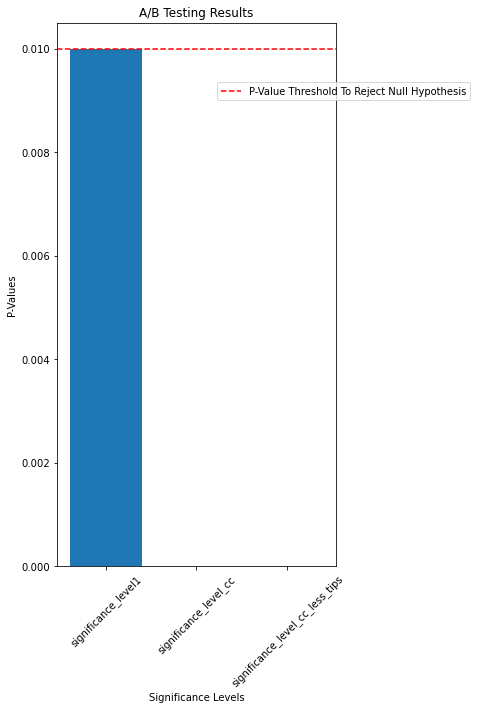

In [16]:
#create a plot to show how remarkably significant the test results are

#create a new dataframe with keys 'p-values' and 'sig_level'
plotdata = {'p-values': [.01, 4.5301445359736376e-91, 1.5386735669071931e-13],
                   'sig_level': ['significance_level1', 'significance_level_cc', 'significance_level_cc_less_tips']}
#set plot size to be taller than the default output to see if we can capture the significance levels                         
plt.figure(figsize = (5,10))
#set up the bar plot axes
plt.bar(x = plotdata['sig_level'], height = plotdata['p-values'])
#plot a line at the significance level of 1% to show stakeholders the threshold needed to fail to reject the null hypothesis
plt.axhline(y = .01, color='r', linestyle = '--', label = 'P-Value Threshold To Reject Null Hypothesis')
#clean up the x axis label orientation, set titles, set legend and location
plt.xticks(rotation = 45)
plt.title("A/B Testing Results")
plt.xlabel('Significance Levels')
plt.ylabel('P-Values')
plt.legend(bbox_to_anchor=(1.5,0.9))

plt.show()

### Task 4. Communicate insights with stakeholders

1. Credit Card payments are likely to be higher than cash payments, even when eliminating tips. Implementing strategies to encourage customers to pay with credit card will increase revenue.

2. This data does not take into account the possibility that customers may have paid with a combination of credit card and cash. The nature of this test assumes that customers paid with only 1 payment type. Eliminating tips helps reduce the potential effect on our data, but not eliminate it entirely.

#### See attached executive summary